In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [38]:
#all matches data
ipl_df = pd.read_csv('/content/all_matches.csv')

In [3]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,4/18/2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1,1,1,1,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,4/18/2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,4/18/2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,4/18/2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,4/18/2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Manipulation**

In [4]:
ipl_df.season.unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', 2012, 2013, 2014,
       2015, 2016, 2017, 2019, 2018, '2018', '2019', '2020/21', '2021',
       2021, 2022, 2023], dtype=object)

In [5]:
ipl_df.replace('2007/08','2008',inplace=True)

In [6]:
ipl_df.replace('2009/10','2010',inplace=True)

In [7]:
ipl_df.replace('2020/21','2020',inplace=True)

In [8]:
ipl_df.dtypes

match_id                  int64  
season                    object 
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
F1                        int64  
F2                        int64  
F3                        int64  
balls_faced               int64  
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [9]:
ipl_df['season'] = ipl_df['season'].astype('int64')

In [10]:
ipl_df.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021, 2022, 2023])

In [11]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,4/18/2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1,1,1,1,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,4/18/2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,4/18/2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,4/18/2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,4/18/2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtering DF to required data (data of previous 4 seasons)

In [12]:
ipl_df_2020 = ipl_df[(ipl_df.season>=2020)]
ipl_df_2020.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179058,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179059,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,0.2,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179060,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,0.3,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,1,1,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179061,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,0.4,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179062,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,0.5,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Finisher's data -- players with criteria of playing after 16th over


In [13]:
ipl_df_finisher = ipl_df_2020[(ipl_df_2020.ball>=16)]
ipl_df_finisher.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
243718,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,19.2,Gujarat Titans,Chennai Super Kings,B Sai Sudharsan,HH Pandya,M Pathirana,0,1,1,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243719,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,19.3,Gujarat Titans,Chennai Super Kings,B Sai Sudharsan,HH Pandya,M Pathirana,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,lbw,B Sai Sudharsan,NaN,NaN
243720,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,19.4,Gujarat Titans,Chennai Super Kings,Rashid Khan,HH Pandya,M Pathirana,1,1,1,1,0,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
243721,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,19.5,Gujarat Titans,Chennai Super Kings,HH Pandya,Rashid Khan,M Pathirana,1,1,1,1,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
243722,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,19.6,Gujarat Titans,Chennai Super Kings,Rashid Khan,HH Pandya,M Pathirana,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,caught,Rashid Khan,NaN,NaN


In [14]:
df0= pd.DataFrame(ipl_df_finisher.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [15]:
df1= pd.DataFrame(ipl_df_finisher.groupby('striker')['ball'].count()).reset_index()

In [16]:
df2= df0.merge(df1,on = 'striker', how='left')
df2= df2[df2.runs_off_bat >= 200]
df2= df2[df2.ball >= 100]
df2

,striker,runs_off_bat,ball
0,A Badoni,212,137
5,AB de Villiers,358,163
6,AD Russell,309,186
11,AR Patel,328,205
16,AT Rayudu,206,125
19,Abdul Samad,237,146
42,DA Miller,316,205
57,F du Plessis,257,126
62,GJ Maxwell,280,157
67,HH Pandya,446,248


In [17]:
df2['strike_rate']= df2['runs_off_bat']/df2['ball']*100
df2.reset_index(inplace=True, drop=True)
df2

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,212,137,154.744526
1,AB de Villiers,358,163,219.631902
2,AD Russell,309,186,166.129032
3,AR Patel,328,205,160.000000
4,AT Rayudu,206,125,164.800000
5,Abdul Samad,237,146,162.328767
6,DA Miller,316,205,154.146341
7,F du Plessis,257,126,203.968254
8,GJ Maxwell,280,157,178.343949
9,HH Pandya,446,248,179.838710


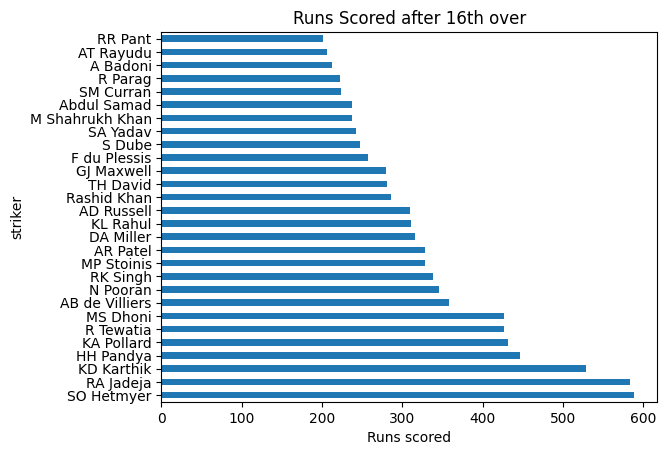

In [18]:
df2.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).plot(kind ='barh')
plt.title('Runs Scored after 16th over')
plt.xlabel('Runs scored')
plt.show()

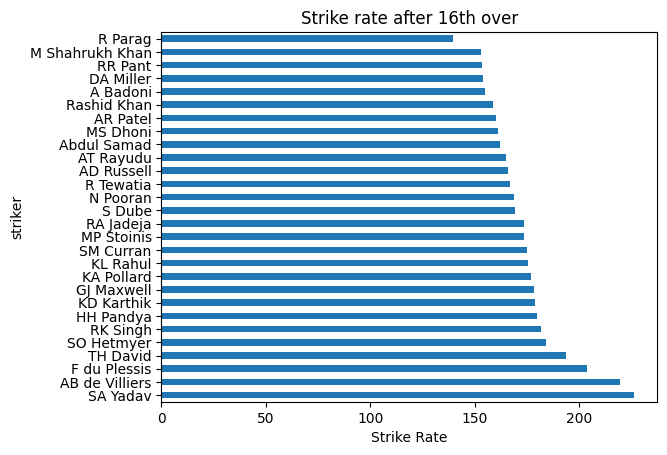

In [19]:
df2.groupby(['striker'])['strike_rate'].sum().sort_values(ascending = False).plot(kind ='barh')
plt.title('Strike rate after 16th over')
plt.xlabel('Strike Rate')
plt.show()

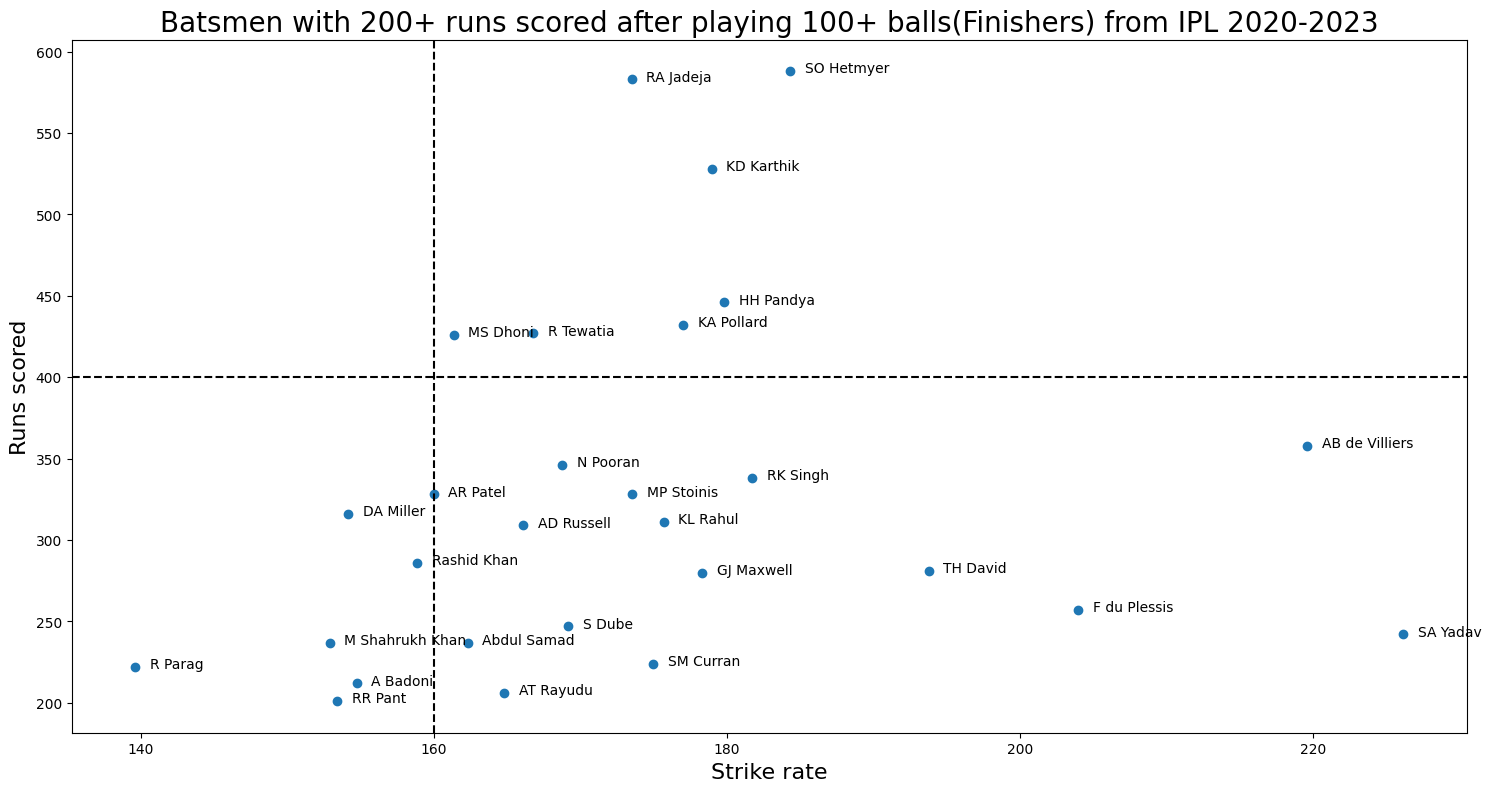

In [20]:
plt.figure(figsize=(18,9))
plt.scatter(df2.strike_rate, df2.runs_off_bat)

for i in range(len(df2)):
     plt.text(df2['strike_rate'][i] + 1, df2['runs_off_bat'][i] - 1, df2['striker'][i] )

plt.title('Batsmen with 200+ runs scored after playing 100+ balls(Finishers) from IPL 2020-2023', fontsize=20 )
plt.xlabel('Strike rate', fontsize=16)
plt.ylabel('Runs scored', fontsize=16)
plt.axvline(160, ls='--', color='black')
plt.axhline(400, ls='--', color='black')
plt.show()

#Finisher's data -- players with criteria of playing after 16th over -- CSK

In [21]:
ipl_df_finisher_csk = ipl_df_finisher[(ipl_df_finisher.batting_team == 'Chennai Super Kings')]
ipl_df_finisher_csk.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
242994,1370350,2023,5/23/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,19.3,Chennai Super Kings,Gujarat Titans,MM Ali,RA Jadeja,Mohammed Shami,0,1,1,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242995,1370350,2023,5/23/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,19.4,Chennai Super Kings,Gujarat Titans,MM Ali,RA Jadeja,Mohammed Shami,1,0,1,0,0,2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
242996,1370350,2023,5/23/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,19.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,MM Ali,Mohammed Shami,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242997,1370350,2023,5/23/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,19.6,Chennai Super Kings,Gujarat Titans,MM Ali,RA Jadeja,Mohammed Shami,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242998,1370350,2023,5/23/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,19.7,Chennai Super Kings,Gujarat Titans,RA Jadeja,MM Ali,Mohammed Shami,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,bowled,RA Jadeja,NaN,NaN


In [22]:
df3= pd.DataFrame(ipl_df_finisher_csk.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [23]:
df4= pd.DataFrame(ipl_df_finisher_csk.groupby('striker')['ball'].count()).reset_index()

In [24]:
df5= df3.merge(df4,on = 'striker', how='left')

In [25]:
df5['strike_rate']= df5['runs_off_bat']/df5['ball']*100
df5

,striker,runs_off_bat,ball,strike_rate
0,AM Rahane,33,11,300.000000
1,AT Rayudu,206,125,164.800000
2,BA Stokes,6,4,150.000000
3,CJ Jordan,11,8,137.500000
4,D Pretorius,34,22,154.545455
5,DJ Bravo,65,37,175.675676
6,DL Chahar,9,10,90.000000
7,DP Conway,64,42,152.380952
8,F du Plessis,161,72,223.611111
9,Imran Tahir,13,8,162.500000


In [26]:
df5= df5[df5.strike_rate >= 160]
df5= df5[df5.runs_off_bat >= 150]
df5= df5[df5.ball >= 50]
df5.reset_index(inplace=True, drop=True)

df5

,striker,runs_off_bat,ball,strike_rate
0,AT Rayudu,206,125,164.800000
1,F du Plessis,161,72,223.611111
2,MS Dhoni,426,264,161.363636
3,RA Jadeja,583,336,173.511905
4,S Dube,163,87,187.356322


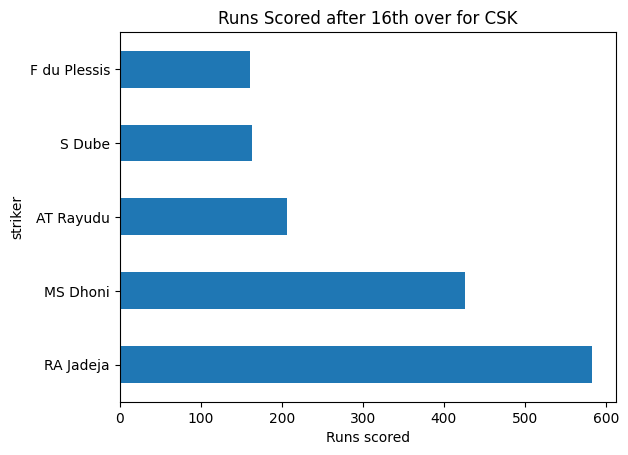

In [27]:
df5.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).plot(kind ='barh')
plt.title('Runs Scored after 16th over for CSK')
plt.xlabel('Runs scored')
plt.show()

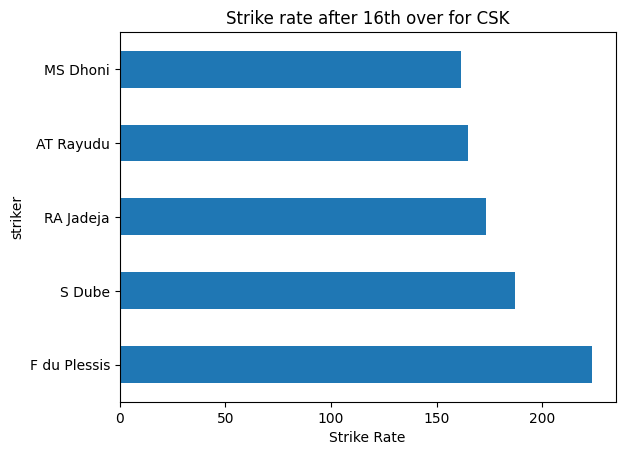

In [28]:
df5.groupby(['striker'])['strike_rate'].sum().sort_values(ascending = False).plot(kind ='barh')
plt.title('Strike rate after 16th over for CSK')
plt.xlabel('Strike Rate')
plt.show()

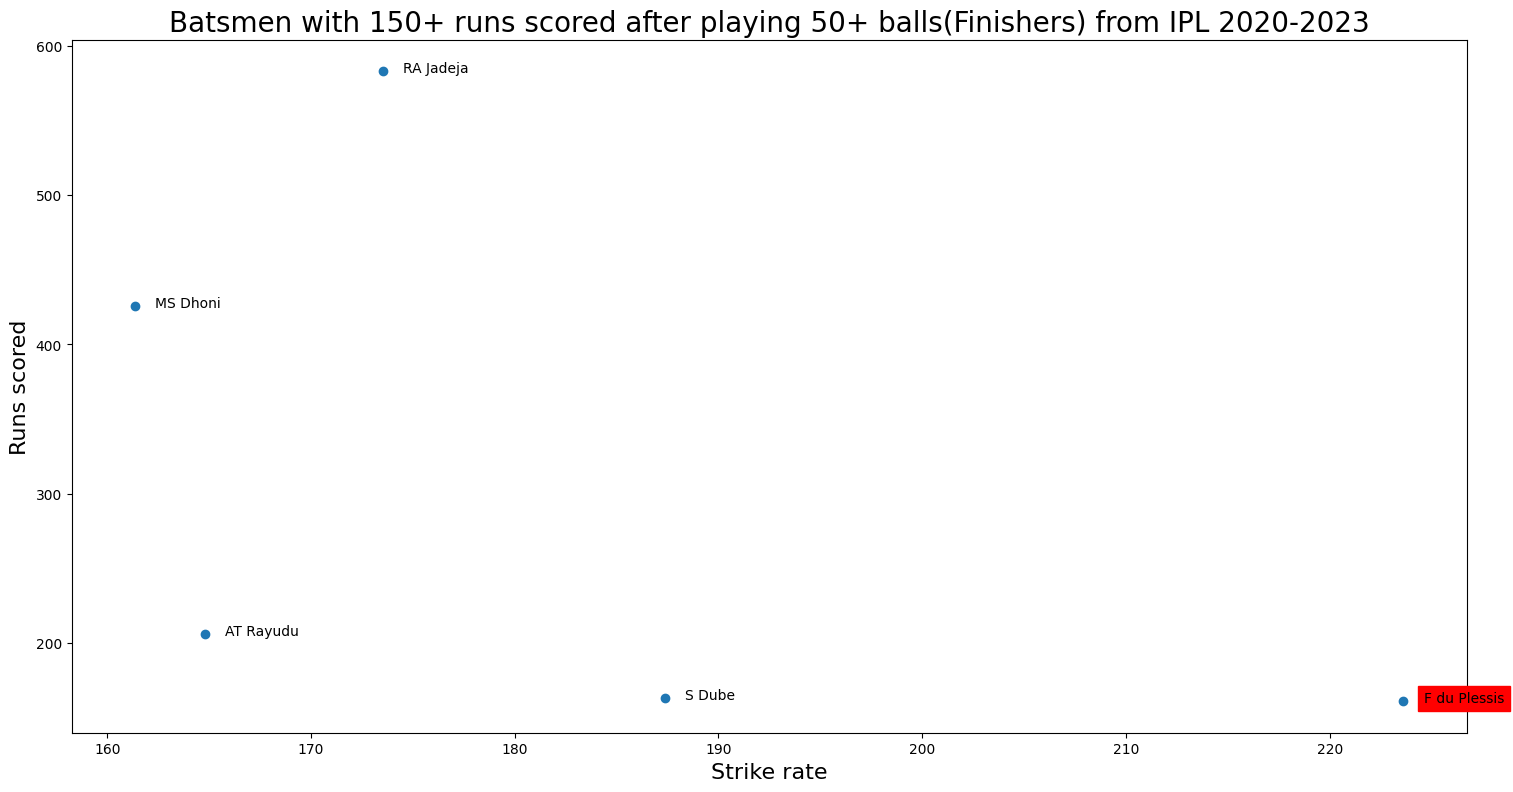

In [29]:
from matplotlib import markers
plt.figure(figsize=(18,9))
plt.scatter(df5.strike_rate, df5.runs_off_bat)

for i in range(len(df5)):
  if (df5['striker'][i] == 'F du Plessis'):
    plt.text(df5['strike_rate'][i] + 1, df5['runs_off_bat'][i] - 1, df5['striker'][i],backgroundcolor = 'red')
  else:
     plt.text(df5['strike_rate'][i] + 1, df5['runs_off_bat'][i] - 1, df5['striker'][i] )

plt.title('Batsmen with 150+ runs scored after playing 50+ balls(Finishers) from IPL 2020-2023', fontsize=20 )
plt.xlabel('Strike rate', fontsize=16)
plt.ylabel('Runs scored', fontsize=16)
plt.show()

#Finisher's data -- players with highest boundary percentage


In [30]:
ipl_df_finisher.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179158,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,16.1,Mumbai Indians,Chennai Super Kings,KH Pandya,KA Pollard,L Ngidi,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,caught,KH Pandya,NaN,NaN
179159,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,16.2,Mumbai Indians,Chennai Super Kings,JL Pattinson,KA Pollard,L Ngidi,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179160,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,16.3,Mumbai Indians,Chennai Super Kings,KA Pollard,JL Pattinson,L Ngidi,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179161,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,16.4,Mumbai Indians,Chennai Super Kings,JL Pattinson,KA Pollard,L Ngidi,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179162,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,16.5,Mumbai Indians,Chennai Super Kings,KA Pollard,JL Pattinson,L Ngidi,0,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
runs_ratio= pd.DataFrame(ipl_df_finisher.groupby('striker')['runs_off_bat'].count()).reset_index()
runs_ratio.head()

,striker,runs_off_bat
0,A Badoni,137
1,A Manohar,47
2,A Mishra,12
3,A Nortje,37
4,A Zampa,5


In [32]:
boundary_riders_df = ipl_df_finisher[(ipl_df_finisher['runs_off_bat'] == 6) | (ipl_df_finisher['runs_off_bat'] == 4)]
boundary_riders_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,F1,F2,F3,balls_faced,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
179165,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,17.2,Mumbai Indians,Chennai Super Kings,JL Pattinson,KA Pollard,SM Curran,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179167,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,17.4,Mumbai Indians,Chennai Super Kings,KA Pollard,JL Pattinson,SM Curran,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179172,1216492,2020,9/19/2020,Sheikh Zayed Stadium,1,18.3,Mumbai Indians,Chennai Super Kings,JL Pattinson,RD Chahar,L Ngidi,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179282,1216492,2020,9/19/2020,Sheikh Zayed Stadium,2,16.1,Chennai Super Kings,Mumbai Indians,RA Jadeja,F du Plessis,JL Pattinson,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179286,1216492,2020,9/19/2020,Sheikh Zayed Stadium,2,16.5,Chennai Super Kings,Mumbai Indians,RA Jadeja,F du Plessis,JL Pattinson,0,1,1,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
bound_ratio= pd.DataFrame(boundary_riders_df.groupby('striker')['runs_off_bat'].count()).reset_index()
bound_ratio.head()

,striker,runs_off_bat
0,A Badoni,24
1,A Manohar,12
2,A Mishra,2
3,A Nortje,6
4,AB de Villiers,53


In [34]:
bound_ratio = runs_ratio.merge(bound_ratio,on = 'striker', how='left')
bound_ratio.head()

,striker,runs_off_bat_x,runs_off_bat_y
0,A Badoni,137,24.0
1,A Manohar,47,12.0
2,A Mishra,12,2.0
3,A Nortje,37,6.0
4,A Zampa,5,NaN


In [35]:
bound_ratio['bound_percent'] = bound_ratio['runs_off_bat_y']/bound_ratio['runs_off_bat_x']*100
bound_ratio.head()

,striker,runs_off_bat_x,runs_off_bat_y,bound_percent
0,A Badoni,137,24.0,17.518248
1,A Manohar,47,12.0,25.531915
2,A Mishra,12,2.0,16.666667
3,A Nortje,37,6.0,16.216216
4,A Zampa,5,NaN,NaN


In [36]:
len(bound_ratio['striker'].unique())

252

In [37]:
bound_ratio['bound_percent'].fillna(0,inplace = True)
bound_ratio = bound_ratio.sort_values(by=['bound_percent'], ascending=False)
bound_ratio = bound_ratio[bound_ratio.runs_off_bat_y >= 50]
bound_ratio

,striker,runs_off_bat_x,runs_off_bat_y,bound_percent
5,AB de Villiers,163,53.0,32.515337
180,RK Singh,186,51.0,27.419355
99,KD Karthik,295,79.0,26.779661
131,MP Stoinis,189,50.0,26.455026
203,SO Hetmyer,319,81.0,25.391850
67,HH Pandya,248,62.0,25.000000
98,KA Pollard,244,60.0,24.590164
133,MS Dhoni,264,63.0,23.863636
175,RA Jadeja,336,79.0,23.511905
174,R Tewatia,256,60.0,23.437500


# ***Conclusion***

MSD as a whole


*   As a batsman works below average in the last 4 years.
*   Striking at 120's overall.

MSD as a finisher

*   Ranks in top 15 players in this timespan as a finisher.
*   Strikes at 160 + in death overs with over 400 + runs.

MSD for CSK

*   Limited players available to finish the innings for CSK at this time.
*   One of the 4 players available to CSK with these abilities. (Others : Jadeja, Dube, Rayudu)
*   Also one of the two batters for CSK having higher boundary percentage.



My POV

*   As there is no mega auction coming soon, CSK needs a magic moment to get a player of cailbre like MSD barring batting perspective.
*   As long as impact player rule carries on, the chances of MSD playing for CSK (purely as WK and brain behind the wickets) are to be bumped.
*   When CSK fields, he should be playing as WK & an informal captain who helps to the formal captain, and might be impacted with a batsman in the next innings.
*   Due to the impact of MSD on CSK management and fans, he should be playing as stats are not that much degrading 😎









